In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default="svg"

C:\Users\K Shankar\AppData\Roaming\Python\Python312\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [2]:
raw_df=pd.read_csv('Zomato_Mumbai_Dataset.csv',delimiter='|')

In [3]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [4]:
raw_df.shape

(15081, 12)

In [5]:
raw_df.info

<bound method DataFrame.info of                     NAME PRICE  \
0                Hitchki  1200   
1           Baba Falooda   400   
2          Chin Chin Chu  1800   
3         Butterfly High  1000   
4              BKC  DIVE  1200   
...                  ...   ...   
15076  Hari Om Snack Bar   350   
15077           PitaBurg   400   
15078     Uncha Otlawala   300   
15079     Mandarin Panda   400   
15080                     NaN   

                                         CUSINE_CATEGORY    CITY  \
0      Modern Indian,North Indian,Chinese,Momos,Birya...  Mumbai   
1                           Desserts,Ice Cream,Beverages  Mumbai   
2                                          Asian,Chinese  Mumbai   
3                                          Modern Indian  Mumbai   
4                       North Indian,Chinese,Continental  Mumbai   
...                                                  ...     ...   
15076                     Fast Food,South Indian,Chinese  Mumbai   
15077          

In [6]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


In [7]:
wrong_data=raw_df['PAGE NO'] == 'PAGE NO'
raw_df[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [8]:
## Performing Negation of the wrong dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~wrong_data]

In [9]:
# Dropping columns which are not required for further analysis
raw_df.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)

C:\Users\K Shankar\AppData\Local\Temp\ipykernel_29872\4209744280.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [11]:
# Checking for Null records
raw_df.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [12]:
# Checking for a null row
raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Droping the above row from the dataset
raw_df = raw_df.drop(labels=15080, axis=0)

In [14]:
# Replacing the other null records with NA 
raw_df.fillna('NA', inplace=True)

In [15]:
# Confirming all the null records are correct
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

In [16]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [17]:
# Replacing the text values with '0'
raw_df['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\K Shankar\AppData\Local\Temp\ipykernel_29872\3030763599.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1123, dtype: int64

In [19]:
# Replacing the text values with '0'
raw_df['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\K Shankar\AppData\Local\Temp\ipykernel_29872\49067986.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
# Changing Data Type of the numerical columns
raw_df['PRICE'] = raw_df['PRICE'].astype('int64')
raw_df['RATING'] = raw_df['RATING'].astype('float64')
raw_df['VOTES'] = raw_df['VOTES'].astype('int64')

In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [22]:
raw_df['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [23]:
# Splitting the column and storing it in temp_df dataframe
temp_df = raw_df['TIMING'].str.split("(", n = 1, expand = True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [24]:
# Assigning the columns back to the raw_df dataframe
raw_df['TIMING'] = temp_df[0]
raw_df['DAYS_OPEN'] = temp_df[1]
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [25]:
# Removing the bracket character from Days column
raw_df['DAYS_OPEN'] = raw_df['DAYS_OPEN'].replace(r'\(|\)','',regex=True)
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [26]:
 # Checking for Null records in DAYS_OPEN column 
 
raw_df.isnull().sum() 

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [27]:
# Replacing the Null values with 'NA' 
 
raw_df.fillna('NA', inplace=True) 

In [28]:
# Checking info of all the columns 
 
raw_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [29]:
# Finding those restaurant whose has 0 Rating or Votes 
 
useless_data = (raw_df['RATING'] == 0.0) | (raw_df['VOTES'] == 0) 
raw_df[useless_data] 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pmFri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [30]:
 ## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame 
## This permamnently remove the wrong data from the original dataframe 
 
raw_df = raw_df[~useless_data] 

In [31]:
 # Checking the unique values in the column 
 
raw_df['RATING_TYPE'].value_counts() 

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [32]:
 # Translating the texts into proper English text 
 
raw_df['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True) 
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True) 
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True) 

C:\Users\K Shankar\AppData\Local\Temp\ipykernel_29872\1998647241.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\K Shankar\AppData\Local\Temp\ipykernel_29872\1998647241.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [33]:
# Checking all the values correctly mapped 
 
raw_df['RATING_TYPE'].value_counts() 

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

In [34]:
raw_df['REGION'].value_counts() 

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [35]:
# Removing the irrelevant text from the Region column
 
raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True) 

In [36]:
# Removing the West & East from the Region column 
 
raw_df['REGION'] = raw_df['REGION'].str.replace(' West| west| East| east','',regex=True) 

In [37]:
raw_df['REGION'].value_counts() 

REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Flea Bazaar Café       3
Majiwada               3
Panvel                 2
CBD Belapur            1
Girgaon Chowpatty      1
Name: count, Length: 101, dtype: int64

In [38]:
# Replacing Small regions with Known region name 
 
raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True) 
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True) 

In [39]:
# Finding all the duplicate rows 
raw_df[raw_df.duplicated()] 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Andheri,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [40]:
# Dropping all the duplicate rows 
raw_df = raw_df.drop_duplicates() 

In [41]:
zomato_df = raw_df.copy() 

In [42]:
zomato_df.head() 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


In [63]:
#!pip install -U kaleido

In [53]:
#!pip install --upgrade plotly

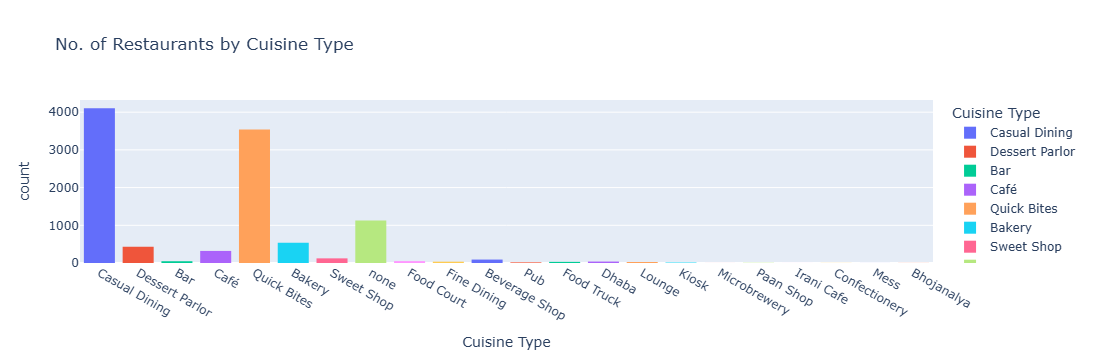

In [52]:
#fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',  
#            title= 'No. of Restaurants by Cuisine Type',  
#           labels={'CUSINE TYPE':'Cuisine Type'}) 
#fig.show()
import plotly.express as px
import os
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE', title='No. of Restaurants by Cuisine Type',  
    labels={'CUSINE TYPE':'Cuisine Type'})
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
iplot(fig)

In [54]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index() 
rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True) 
rating_type_df 

,COUNT OF RESTAURANTS,count
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


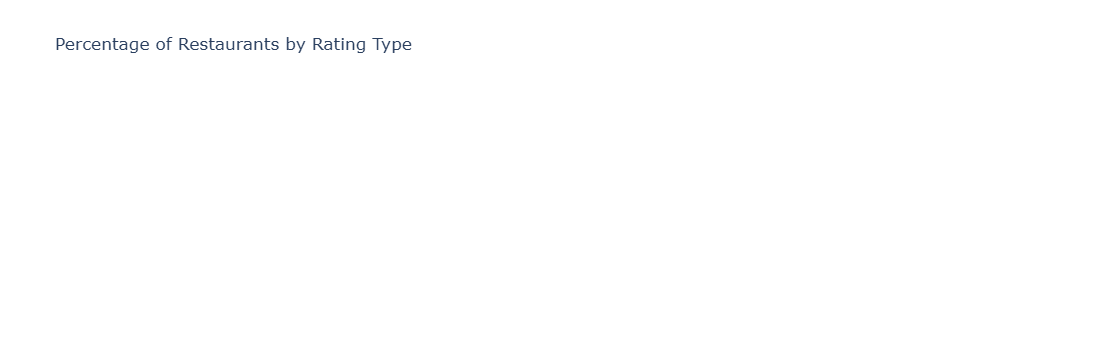

In [95]:
fig = px.pie(rating_type_df, names='COUNT OF RESTAURANTS', values='COUNT OF RESTAURANTS', color='count',  
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import os
#init_notebook_mode(connected=True)
#iplot(fig)
from IPython.display import display, HTML
#display(HTML(fig.to_html()))
#fig.write_html("rating_type_pie_chart.html")
fig.show()

In [56]:
foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck'] 
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


In [57]:
# Assuming restaurants having rating above 4.5 
 
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5] 
highest_rated_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pmTue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


In [60]:
fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE',  
             title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descend
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
iplot(fig)

SyntaxError: unterminated string literal (detected at line 2) (2555967025.py, line 2)